In [27]:
import warnings
import shap
import numpy as np
import matplotlib.pyplot as plt
import time  # Import time module to track execution time

In [18]:
# Suppress TensorFlow warnings
warnings.filterwarnings("ignore", category=UserWarning, module='tensorflow')
warnings.filterwarnings("ignore", category=UserWarning, module='keras')

In [19]:
%run TII_train_net_from_description.py

[82740, 131072, -7]
Epoch 1/100
14/14 [==============================] - 2s 68ms/step - loss: 0.6433 - val_loss: 0.5990 - lr: 0.0010
Epoch 2/100
14/14 [==============================] - 1s 59ms/step - loss: 0.5852 - val_loss: 0.5489 - lr: 0.0010
Epoch 3/100
14/14 [==============================] - 1s 58ms/step - loss: 0.5224 - val_loss: 0.5116 - lr: 0.0010
Epoch 4/100
14/14 [==============================] - 1s 59ms/step - loss: 0.4855 - val_loss: 0.4668 - lr: 0.0010
Epoch 5/100
14/14 [==============================] - 1s 56ms/step - loss: 0.4386 - val_loss: 0.4152 - lr: 0.0010
Epoch 6/100
14/14 [==============================] - 1s 58ms/step - loss: 0.3765 - val_loss: 0.3571 - lr: 0.0010
Epoch 7/100
14/14 [==============================] - 1s 57ms/step - loss: 0.3324 - val_loss: 0.3194 - lr: 0.0010
Epoch 8/100
14/14 [==============================] - 1s 53ms/step - loss: 0.2976 - val_loss: 0.2962 - lr: 0.0010
Epoch 9/100
14/14 [==============================] - 1s 54ms/step - loss: 0.

## Shap Analysis

In [30]:
test_set_size = np.array(Xd).shape
print(f"Test set shape: {test_set_size}")

Test set shape: (5651, 64, 64, 8)


SHAP values shape: (10, 64, 64, 8, 2)
Data shape: (10, 64, 64, 8)
Aggregated SHAP values shape: (10, 8, 2)
Aggregated Data shape: (10, 8)


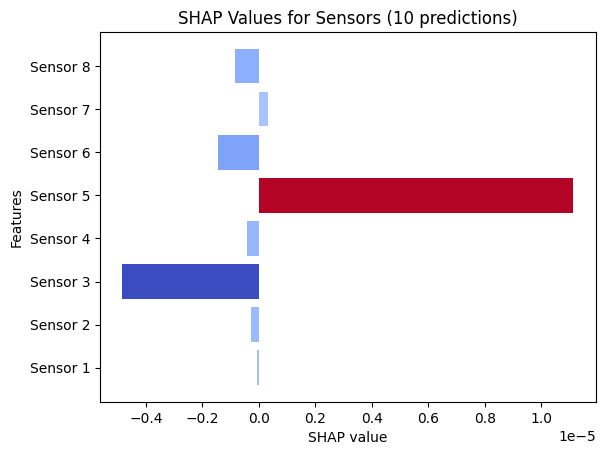

Time taken for SHAP analysis with 10 predictions: 2.68 seconds
SHAP values shape: (20, 64, 64, 8, 2)
Data shape: (20, 64, 64, 8)
Aggregated SHAP values shape: (20, 8, 2)
Aggregated Data shape: (20, 8)


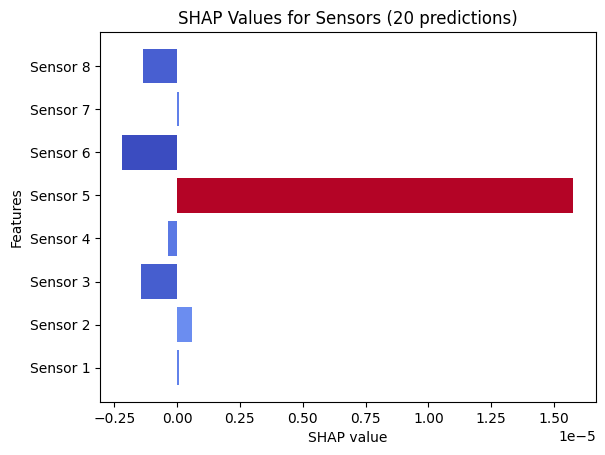

Time taken for SHAP analysis with 20 predictions: 2.71 seconds
SHAP values shape: (30, 64, 64, 8, 2)
Data shape: (30, 64, 64, 8)
Aggregated SHAP values shape: (30, 8, 2)
Aggregated Data shape: (30, 8)


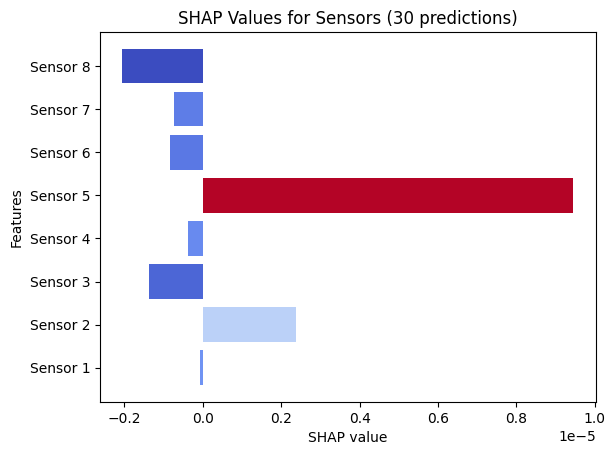

Time taken for SHAP analysis with 30 predictions: 3.03 seconds
SHAP values shape: (40, 64, 64, 8, 2)
Data shape: (40, 64, 64, 8)
Aggregated SHAP values shape: (40, 8, 2)
Aggregated Data shape: (40, 8)


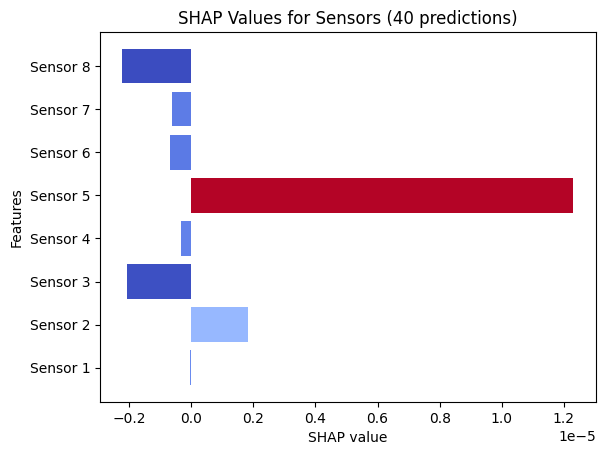

Time taken for SHAP analysis with 40 predictions: 3.14 seconds
SHAP values shape: (50, 64, 64, 8, 2)
Data shape: (50, 64, 64, 8)
Aggregated SHAP values shape: (50, 8, 2)
Aggregated Data shape: (50, 8)


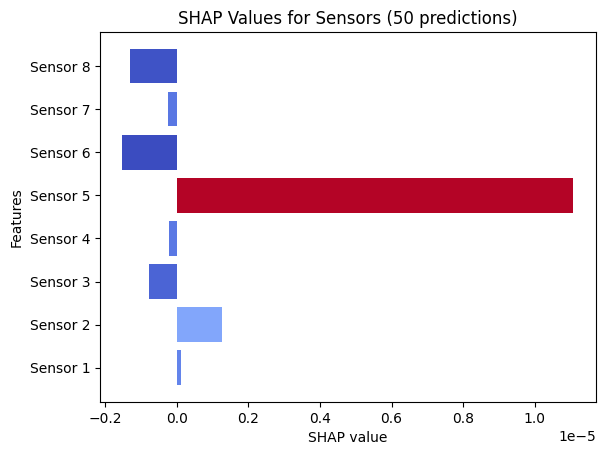

Time taken for SHAP analysis with 50 predictions: 3.47 seconds
SHAP values shape: (100, 64, 64, 8, 2)
Data shape: (100, 64, 64, 8)
Aggregated SHAP values shape: (100, 8, 2)
Aggregated Data shape: (100, 8)


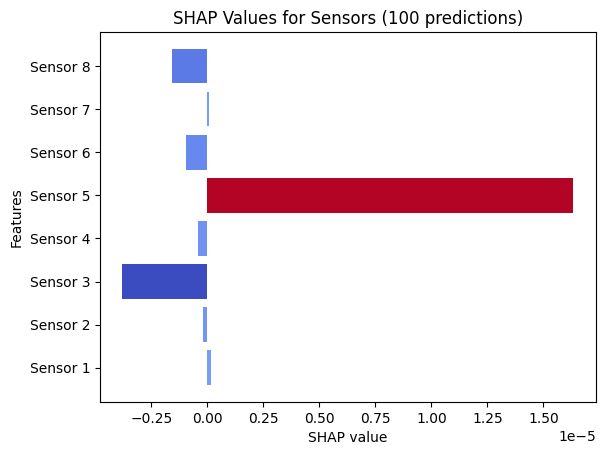

Time taken for SHAP analysis with 100 predictions: 5.06 seconds
SHAP values shape: (200, 64, 64, 8, 2)
Data shape: (200, 64, 64, 8)
Aggregated SHAP values shape: (200, 8, 2)
Aggregated Data shape: (200, 8)


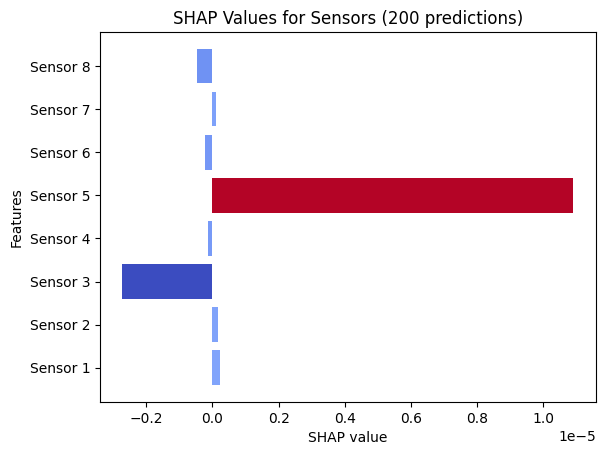

Time taken for SHAP analysis with 200 predictions: 5.93 seconds
SHAP values shape: (500, 64, 64, 8, 2)
Data shape: (500, 64, 64, 8)
Aggregated SHAP values shape: (500, 8, 2)
Aggregated Data shape: (500, 8)


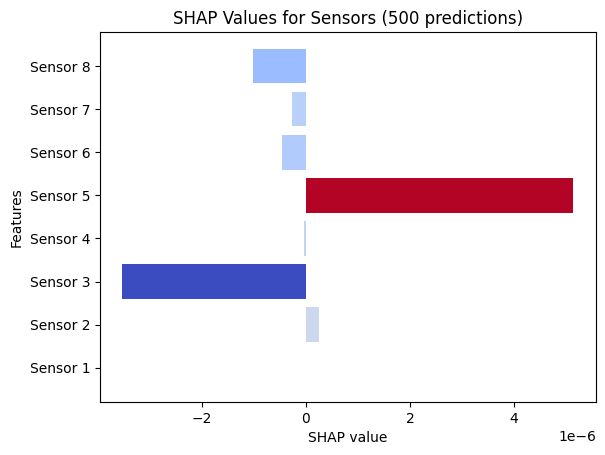

Time taken for SHAP analysis with 500 predictions: 11.04 seconds
SHAP values shape: (5651, 64, 64, 8, 2)
Data shape: (5651, 64, 64, 8)
Aggregated SHAP values shape: (5651, 8, 2)
Aggregated Data shape: (5651, 8)


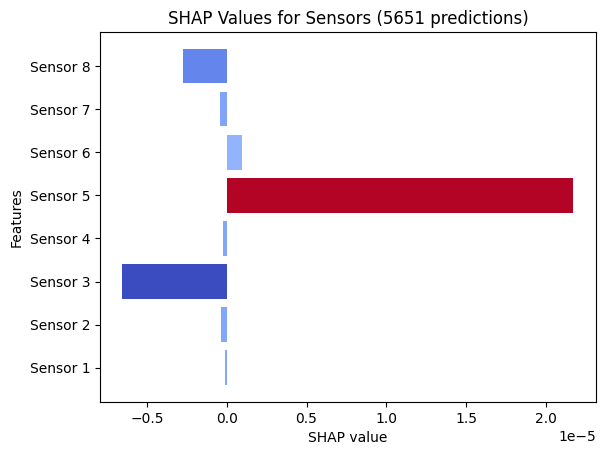

Time taken for SHAP analysis with 5651 predictions: 103.53 seconds


In [29]:
def calculate_and_plot_shap_for_predictions(num_predictions):
    # Track the start time
    start_time = time.time()
    
    # Ensure num_predictions does not exceed the total number of samples in the test set
    num_predictions = min(num_predictions, len(Xd))  # Limit to the number of available samples
    
    # Select num_predictions samples from the data in 4D
    consistent_data = np.array(Xd[:num_predictions])  # Keep the data in 4D
    
    # Initialize SHAP explainer with 4D training data, taking the first 100 samples
    train_data_4d = np.array([Xd[idx][0] for idx in fold_train_ind[:100]])  # 4D training data
    explainer = shap.DeepExplainer(model, train_data_4d)  # SHAP explainer with 4D data
    
    # Compute SHAP values on the 4D consistent test data
    shap_values = explainer.shap_values(consistent_data)
    
    # Log the shape of SHAP values and input data for inspection
    print(f"SHAP values shape: {np.array(shap_values).shape}")
    print(f"Data shape: {consistent_data.shape}")

    # Handle SHAP values list for binary classification (taking first output)
    if isinstance(shap_values, list):
        shap_values = shap_values[0]

    # Aggregate SHAP values across the (64, 64) grid for each of the 8 sensors
    shap_values_per_sensor = np.mean(shap_values, axis=(1, 2))  # Mean across the spatial dimensions
    consistent_data_per_sensor = np.mean(consistent_data, axis=(1, 2))  # Same for input data

    # Check that the aggregation is correct
    print(f"Aggregated SHAP values shape: {shap_values_per_sensor.shape}")
    print(f"Aggregated Data shape: {consistent_data_per_sensor.shape}")

    # Ensure we have 8 sensors in the output (if not, raise an error)
    if shap_values_per_sensor.shape[1] != 8:
        raise ValueError(f"Expected 8 sensors but got {shap_values_per_sensor.shape[1]}.")

    # Select the first output from SHAP values (for binary classification)
    shap_values_first_output = shap_values_per_sensor[:, :, 0]  # Shape: (samples, 8)

    # Plot SHAP values for sensors in order
    ordered_indices = np.argsort([8, 7, 6, 5, 4, 3, 2, 1])  # Order of sensors
    shap_values_ordered = np.mean(shap_values_first_output, axis=0)[ordered_indices]  # Keep signs

    # Plot the SHAP values using distinct colors for each sensor (showing direction)
    feature_names = [f'Sensor {i}' for i in range(8, 0, -1)]  # Sensor names
    colormap = plt.get_cmap('coolwarm')  # Diverging colormap for direction
    colors = colormap((shap_values_ordered - np.min(shap_values_ordered)) / 
                      (np.max(shap_values_ordered) - np.min(shap_values_ordered)))  # Color mapping based on values

    plt.barh(feature_names, shap_values_ordered, color=colors)
    plt.ylabel("Features")
    plt.xlabel("SHAP value")
    plt.title(f"SHAP Values for Sensors ({num_predictions} predictions)")
    plt.gca().invert_yaxis()  # Invert y-axis for correct ordering
    plt.show()

    # Track the end time
    end_time = time.time()
    
    # Calculate and print the total elapsed time
    elapsed_time = end_time - start_time
    print(f"Time taken for SHAP analysis with {num_predictions} predictions: {elapsed_time:.2f} seconds")

# Run the SHAP analysis for 10, 20, 30, 40, 50, 100, 200, and 500 predictions, and display the time taken for each
for num in [10, 20, 30, 40, 50, 100, 200, 500, 5651]:
    calculate_and_plot_shap_for_predictions(num)